In [3]:
! [ -e /content ] && pip install -Uqq fastai

In [4]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastdownload import download_url

In [5]:
!pip install -q jmd_imagescraper

In [6]:
from jmd_imagescraper.core import duckduckgo_search 

In [7]:
snake_types = 'viper snake','rattle snake','cobra snake'


In [8]:
from pathlib import Path
path = Path().cwd()/"Snakes1"
for o in snake_types:
  duckduckgo_search(path, o, o, max_results=80)

Duckduckgo search: viper snake


Duckduckgo search: rattle snake


Duckduckgo search: cobra snake


In [9]:
fns = get_image_files(path)
len(fns)

479

In [10]:
from jmd_imagescraper.imagecleaner import *
display_image_cleaner(path)

HTML(value='<h2>No images left to display in this folder.</h2>', layout=Layout(visibility='hidden'))

GridBox(children=(VBox(children=(Image(value=b'', layout="Layout(width='150px')"), Button(description='Delete'…

In [11]:
failed = verify_images(fns)
failed

(#0) []

In [14]:
snakes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [13]:
dls.valid.show_batch(max_n=5, nrows=1)

NameError: name 'dls' is not defined

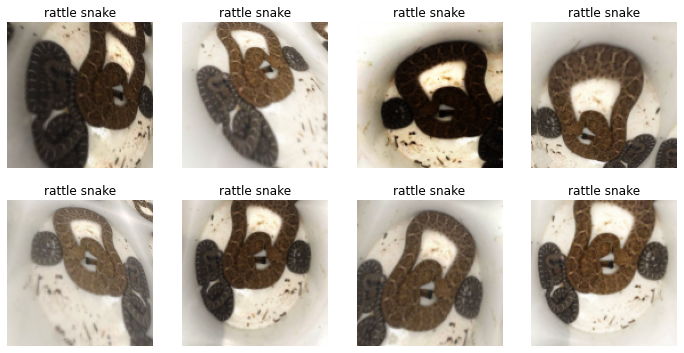

In [15]:
snakes = snakes.new(item_tfms=RandomResizedCrop(128, min_scale=0.5), 
                  batch_tfms=aug_transforms(mult=2))
dls = snakes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [16]:
snakes = snakes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), 
    batch_tfms=aug_transforms())
dls = snakes.dataloaders(path)

In [17]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0008317637839354575)

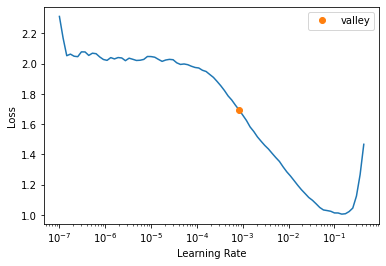

In [18]:
learn.lr_find()

In [19]:
learn.fine_tune(10, 0.0008)

epoch,train_loss,valid_loss,error_rate,time
0,1.877107,1.687032,0.517483,00:04


epoch,train_loss,valid_loss,error_rate,time
0,1.162339,1.050956,0.370629,00:05
1,1.038219,0.751529,0.251748,00:04
2,0.902258,0.594565,0.181818,00:04
3,0.764333,0.536782,0.167832,00:04
4,0.673334,0.478408,0.153846,00:04
5,0.582018,0.455200,0.139860,00:04
6,0.514407,0.451457,0.146853,00:04
7,0.478565,0.441193,0.125874,00:04
8,0.434647,0.440383,0.125874,00:04
9,0.402743,0.441705,0.139860,00:04


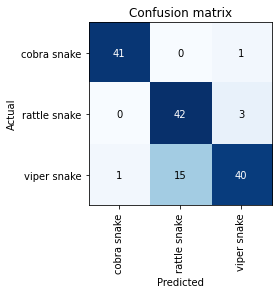

In [20]:
interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_confusion_matrix()

In [ ]:
## idx in cleaner.delete(): cleaner.fns[idx].unlink()
##for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
##fns = get_image_files(path)
##len(fns)

In [ ]:
##dls = snakes.dataloaders(path)
##learn = cnn_learner(dls, resnet18, metrics=error_rate)
##learn.fine_tune(5)

In [21]:
learn.export()

In [ ]:
path=Path()
path.ls(file_exts='.pkl')

In [22]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.7 MB 18.1 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 15.6 MB/s eta 0:00:01
     |████████████████████████████████| 558 kB 30.8 MB/s eta 0:00:01
     |████████████████████████████████| 397 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 15.6 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.23 requires nbconvert<6, but you have nbconvert 6.4.2 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.3.1 OK


In [23]:
path=Path()
learn_inf=load_learner(path/'export.pkl', cpu=True)
btn_upload = widgets.FileUpload()
out_pl = widgets.Output()
btn_run = widgets.Button(description='START')
lbl_pred = widgets.Label()


In [24]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred} | Probability: {probs[pred_idx*100]:.02f}'
    
btn_run.on_click(on_click_classify)

In [25]:
display(VBox([widgets.Label('Select a Snake and Upload-Rattle,Viper and Cobra'), 
      btn_upload, btn_run, out_pl, lbl_pred]))